In [1]:
import pandas as pd

df = pd.read_csv("Excels\\Fake_Real_Data.csv")
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [2]:
df.shape

(9900, 2)

In [3]:
df['label'].value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [7]:
df['label_num'] = df['label'].map({
    'Fake' : 0,
    "Real" : 1
})
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [8]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [18]:
df = df[:1500]
df.shape

(1500, 3)

In [20]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.6759837, 1.4263071, -2.318466, -0.451093, ..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-1.8355803, 1.3101058, -2.4919677, 1.0268308,..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-1.9851209, 0.14389805, -2.4221718, 0.9133005..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-2.7812982, -0.16120885, -1.609772, 1.3624227..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-2.2010763, 0.9961637, -2.4088492, 1.128273, ..."


In [19]:
df['vector'] = df['Text'].apply(lambda x:nlp(x).vector)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2022
)

In [22]:
X_train # every element is a array inside a array 

array([array([-2.02470994e+00,  8.62657726e-01, -1.75410426e+00,  8.05440784e-01,
               5.45606470e+00,  1.46515146e-02,  5.73891178e-02,  3.92684221e+00,
               1.70580611e-01, -1.39107609e+00,  5.52703142e+00,  1.79505682e+00,
              -3.27649069e+00, -8.01215600e-03,  1.12269402e-01,  2.91067529e+00,
               9.42627251e-01, -5.02105474e-01, -1.06921756e+00, -7.09967256e-01,
               1.21449113e+00, -1.45908117e+00, -1.07693064e+00,  4.52204719e-02,
               4.42282438e-01, -1.14826238e+00, -1.90456367e+00, -6.52861834e-01,
              -3.52899581e-01,  6.99098706e-01,  1.34264672e+00, -1.64905451e-02,
              -6.93447709e-01, -1.97048306e+00, -2.61880398e+00, -1.01161015e+00,
              -8.66511464e-01,  9.68851686e-01,  5.07551491e-01,  5.79552352e-01,
               7.07920134e-01,  4.39936034e-02, -1.04514644e-01, -1.96763575e-01,
              -1.62077558e+00,  1.08343482e-01,  7.79938757e-01, -2.14158273e+00,
              -9

In [23]:
import numpy as np
X_train_2d = np.stack(X_train) # this convert its to a 2D array
X_test_2d = np.stack(X_test) # this convert its to a 2D array

In [25]:
X_train_2d # you can't train -ve values 

array([[-2.02471   ,  0.8626577 , -1.7541043 , ..., -1.1780813 ,
        -2.0287535 ,  0.7314128 ],
       [-1.7689468 , -0.6141409 , -0.9884692 , ..., -1.061863  ,
        -1.6431372 ,  1.1064339 ],
       [-2.3848364 ,  0.08102969, -1.6788231 , ..., -1.2722325 ,
        -2.3266053 ,  1.3651834 ],
       ...,
       [-2.3045952 ,  0.29060102, -1.654057  , ..., -1.8792329 ,
        -1.3021306 ,  0.48727357],
       [-2.7914732 ,  0.26514372, -1.7136743 , ..., -1.993619  ,
        -1.2461776 ,  0.9651071 ],
       [-1.9696412 ,  0.6681582 , -2.3080378 , ..., -1.2659578 ,
        -1.9583465 ,  0.63033205]], dtype=float32)

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler # converts to a 0 or pos numbers

scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [34]:
from sklearn.metrics import classification_report

y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       163
           1       0.89      0.91      0.90       137

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [38]:
from  sklearn.neighbors import KNeighborsClassifier
 
#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean') # works best with low dim vectors 

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       163
           1       0.97      0.99      0.98       137

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



Text(95.72222222222221, 0.5, 'Truth')

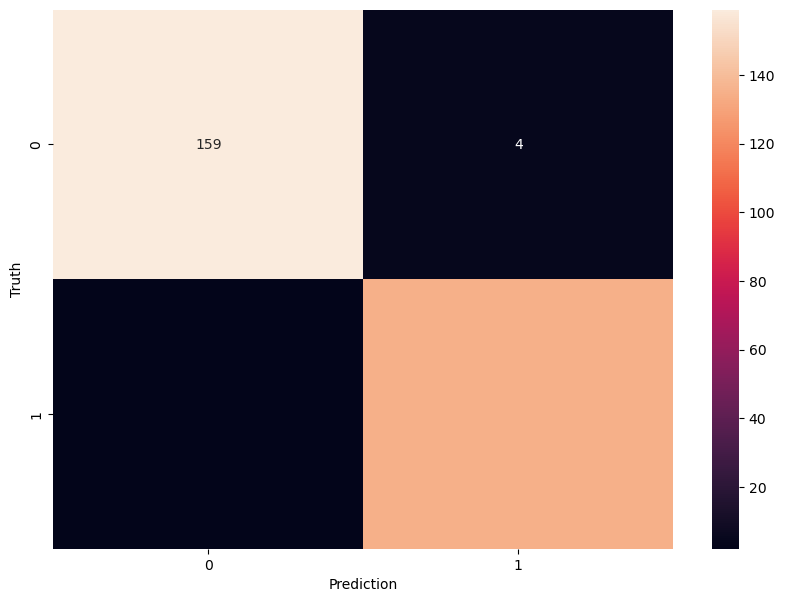

In [39]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')